In [ ]:
!pip install --upgrade mplfinance

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import mplfinance as mpf
import warnings
import plotly.express as px
import plotly.graph_objects as go

#warnings.filterwarnings("ignore")

In [56]:
tsla = pd.read_csv('TSLA (1).csv', index_col='Date', parse_dates=True)
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,329.676666,338.306671,324.470001,334.763336,334.763336,51715200
2022-04-19,335.019989,344.980011,331.776672,342.716675,342.716675,49847700
2022-04-20,343.333344,344.666656,325.083344,325.733337,325.733337,70711200
2022-04-21,358.243347,364.073334,332.140015,336.260010,336.260010,105416400
2022-04-22,338.303345,344.950012,331.333344,335.016663,335.016663,69696600


In [57]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,222.565628,227.311388,217.292284,222.252610,222.252610,1.153232e+08
std,46.816635,47.432318,45.728922,46.361967,46.361967,3.928097e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,186.049999,189.812496,182.102505,186.122494,186.122494,8.890692e+07
50%,223.954994,229.158333,217.709999,223.015007,223.015007,1.087536e+08
75%,254.950005,259.600006,248.805000,255.487499,255.487499,1.356274e+08
max,358.243347,364.073334,332.140015,342.716675,342.716675,3.065906e+08


In [58]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


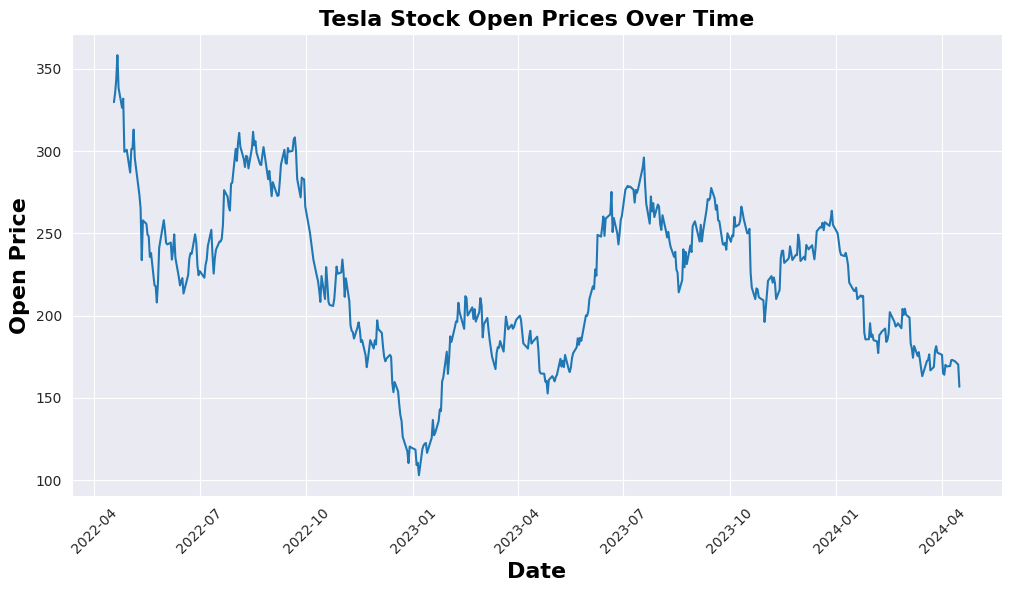

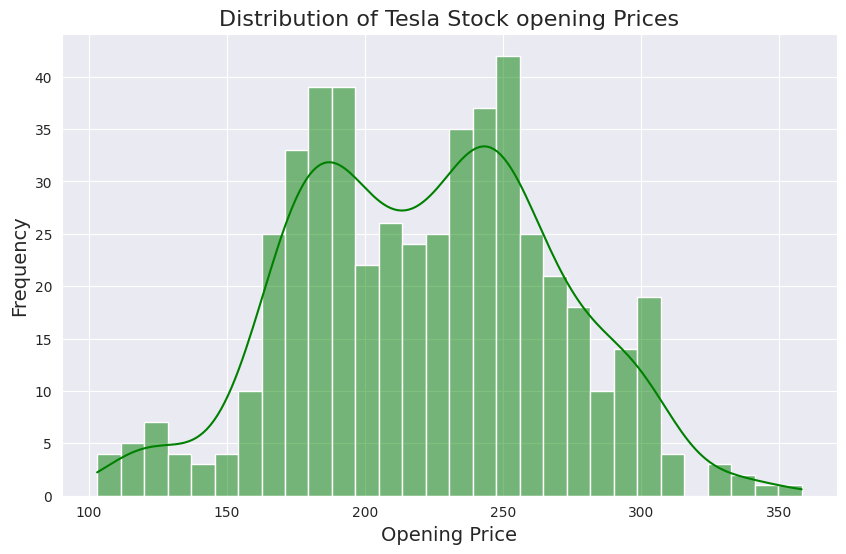

In [63]:
sns.set_style("darkgrid")
palette = sns.color_palette("Set2")

#Opening Prices Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsla, x=tsla.index, y='Open', palette=palette)
plt.title('Tesla Stock Open Prices Over Time', fontsize=16, fontweight='bold', color='Black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='Black')
plt.ylabel('Open Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tsla['Open'], bins=30, kde=True, color='green')
plt.title('Distribution of Tesla Stock opening Prices', fontsize=16)
plt.xlabel('Opening Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

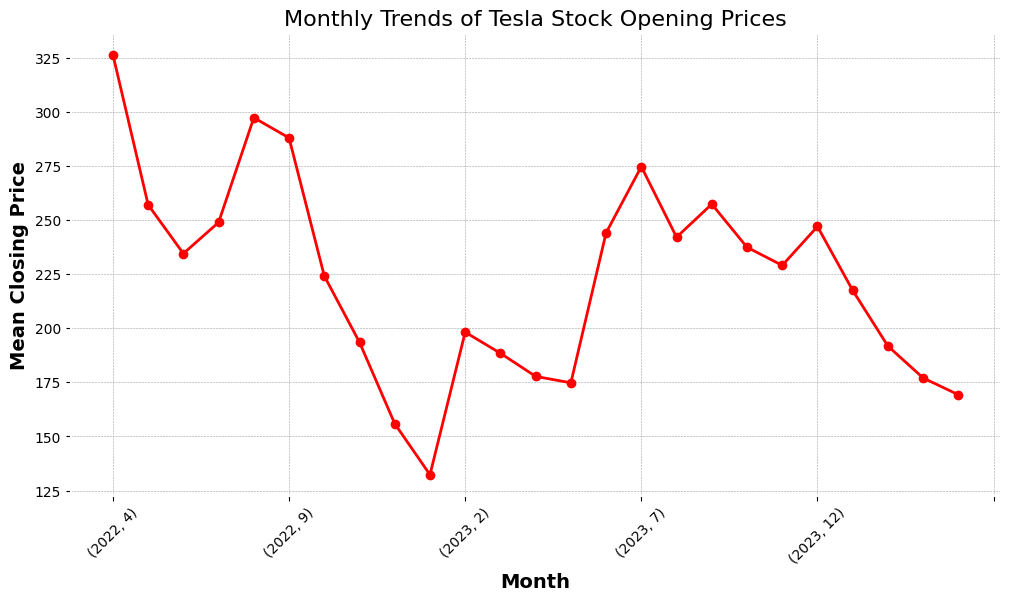

In [93]:
#Plot of monthly trends
tsla['Month'] = tsla.index.month
tsla['Year'] = tsla.index.year

monthly_mean = tsla.groupby(['Year', 'Month'])['Open'].mean()

plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o', color='red')
plt.title('Monthly Trends of Tesla Stock Opening Prices', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Closing Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

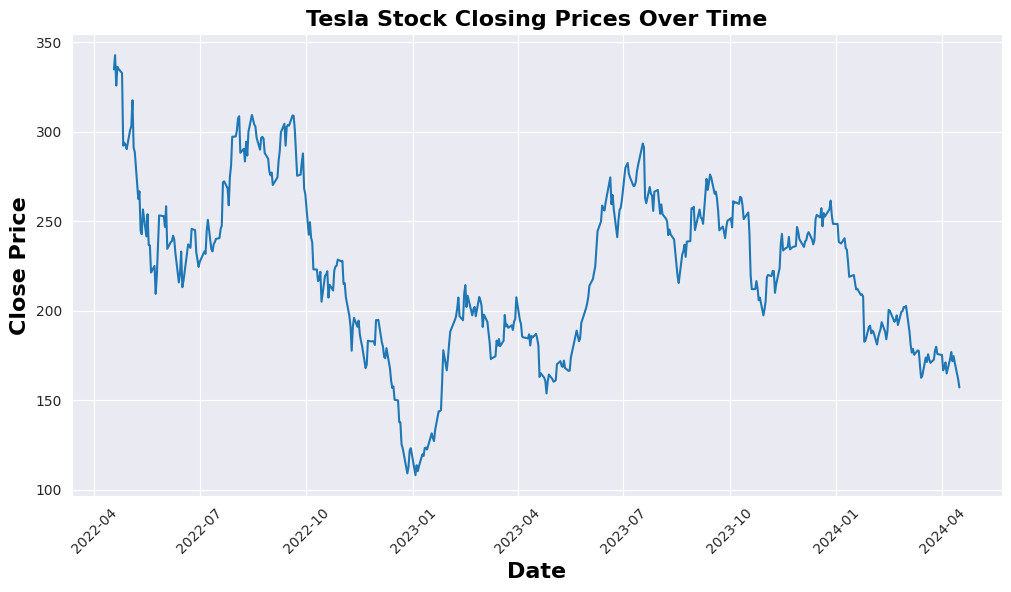

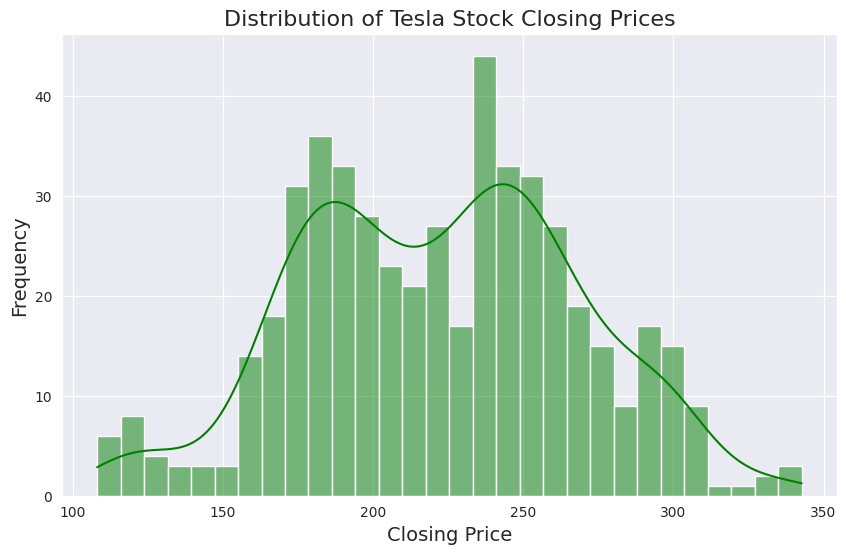

In [60]:
sns.set_style("darkgrid")
palette = sns.color_palette("flare")

#Closing Prices Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsla, x=tsla.index, y='Close', palette=palette)
plt.title('Tesla Stock Closing Prices Over Time', fontsize=16, fontweight='bold', color='Black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='Black')
plt.ylabel('Close Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tsla['Close'], bins=30, kde=True, color='green')
plt.title('Distribution of Tesla Stock Closing Prices', fontsize=16)
plt.xlabel('Closing Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

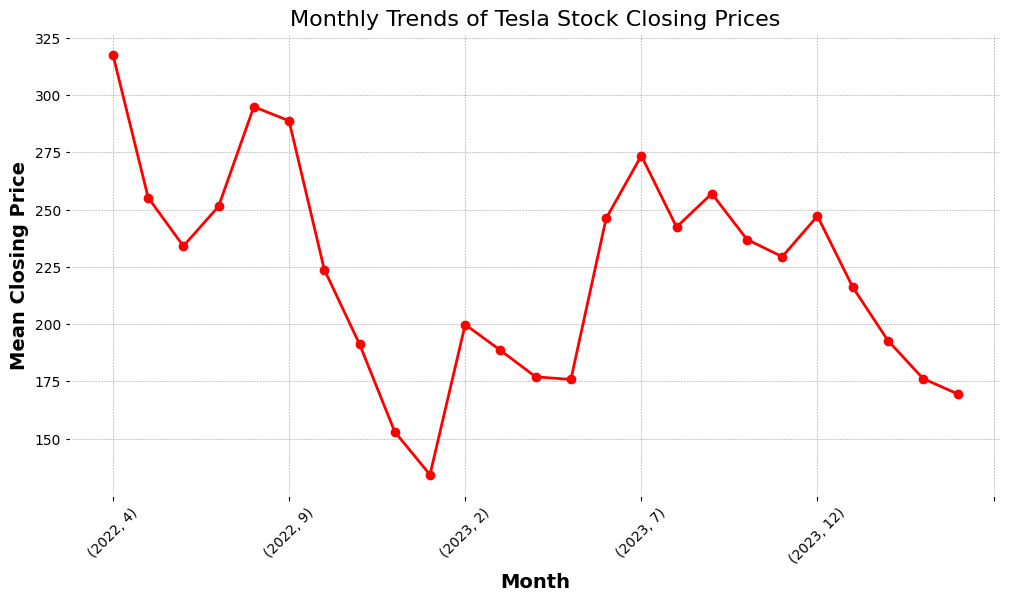

In [92]:
#Plot of monthly trends
tsla['Month'] = tsla.index.month
tsla['Year'] = tsla.index.year

monthly_mean = tsla.groupby(['Year', 'Month'])['Close'].mean()

plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o', color='red')
plt.title('Monthly Trends of Tesla Stock Closing Prices', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Closing Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

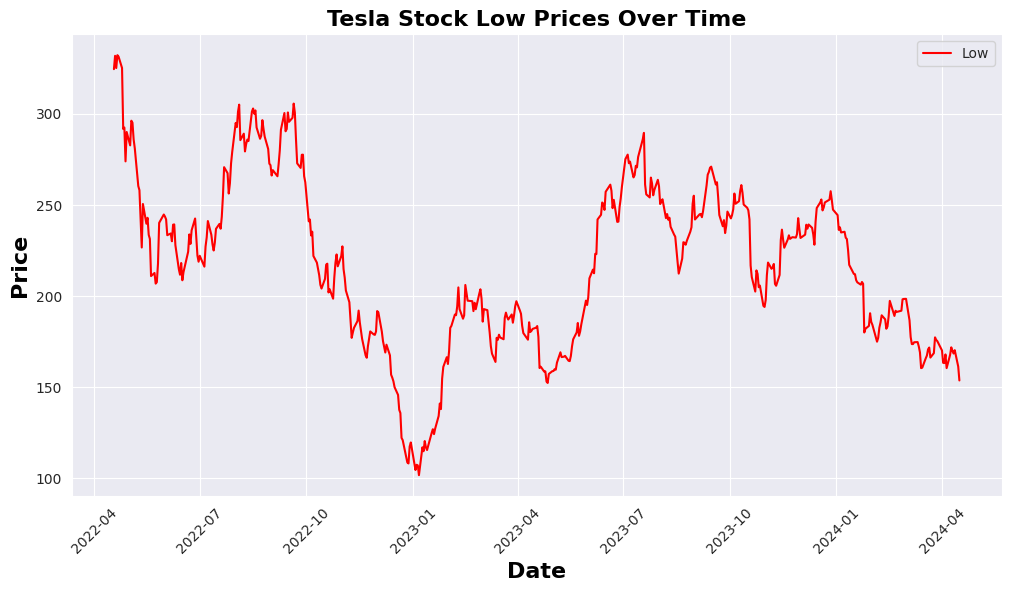

In [61]:
# Plot of the low prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsla, x=tsla.index, y='Low', palette=palette, label='Low', color='red')

plt.title('Tesla Stock Low Prices Over Time', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

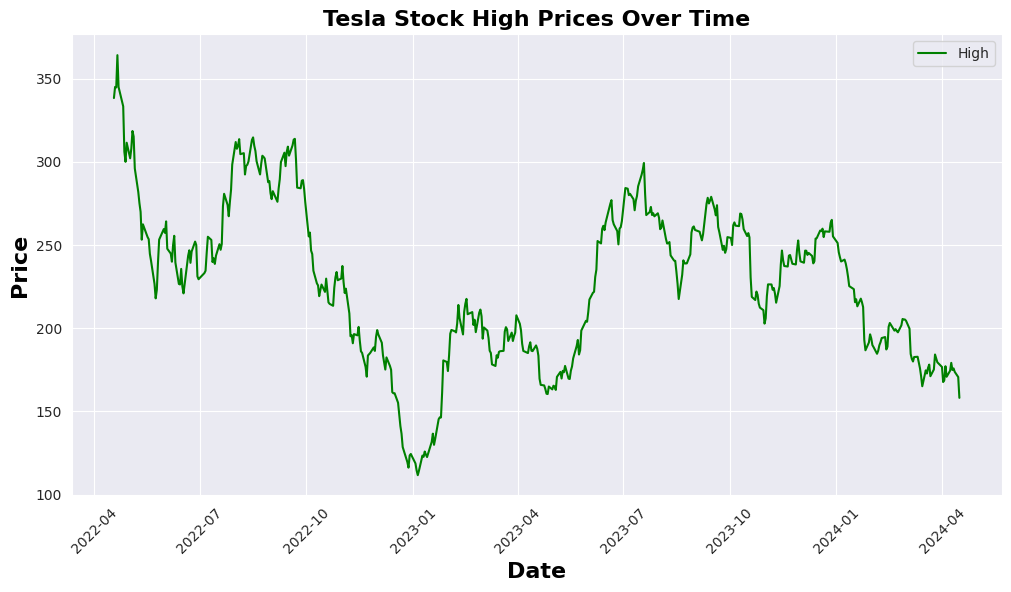

In [69]:
# Plotting High prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsla, x=tsla.index, y='High', palette=palette, label='High', color='green')

plt.title('Tesla Stock High Prices Over Time', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

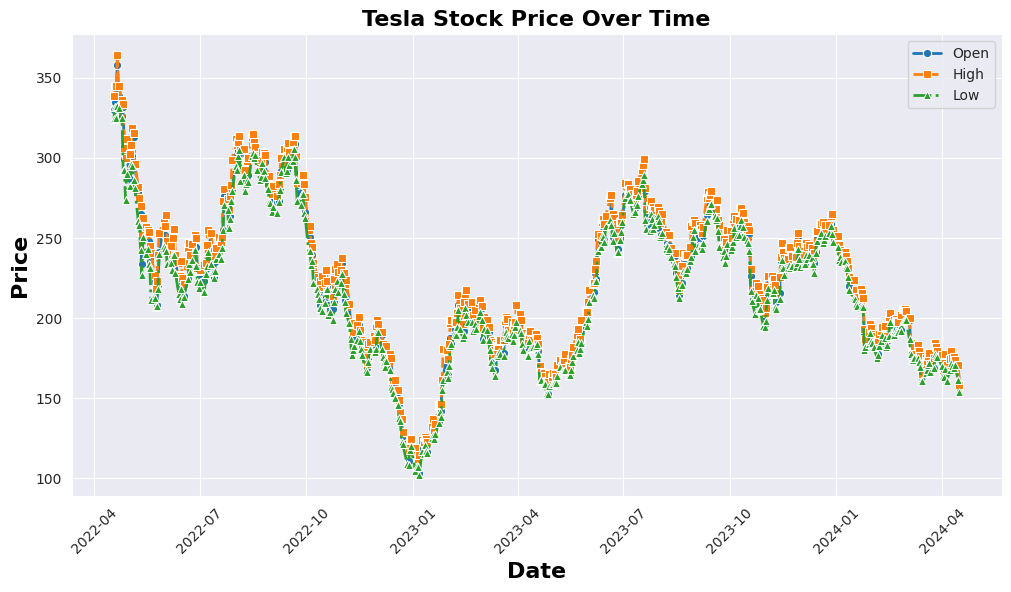

In [76]:
sns.set_style("darkgrid")
palette = sns.color_palette("Set2")  # Using the 'husl' color palette for vibrant colors

# Plot using Seaborn with vibrant colors
plt.figure(figsize=(12, 6))

# Plotting Open, High, and Low prices on the same graph with markers and line styles
sns.lineplot(data=tsla, x=tsla.index, y='Open', palette=palette, label='Open', marker='o', linestyle='-', linewidth=2)
sns.lineplot(data=tsla, x=tsla.index, y='High', palette=palette, label='High', marker='s', linestyle='--', linewidth=2)
sns.lineplot(data=tsla, x=tsla.index, y='Low', palette=palette, label='Low', marker='^', linestyle='-.', linewidth=2)

plt.title('Tesla Stock Price Over Time', fontsize=16, fontweight='bold', color='black')  # Adjust title properties
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')  # Adjust x-axis label properties
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')  # Adjust y-axis label properties
plt.xticks(rotation=45)
plt.legend()  # Add legend for better interpretation
plt.grid(True)  # Add grid for better visualization
plt.show()

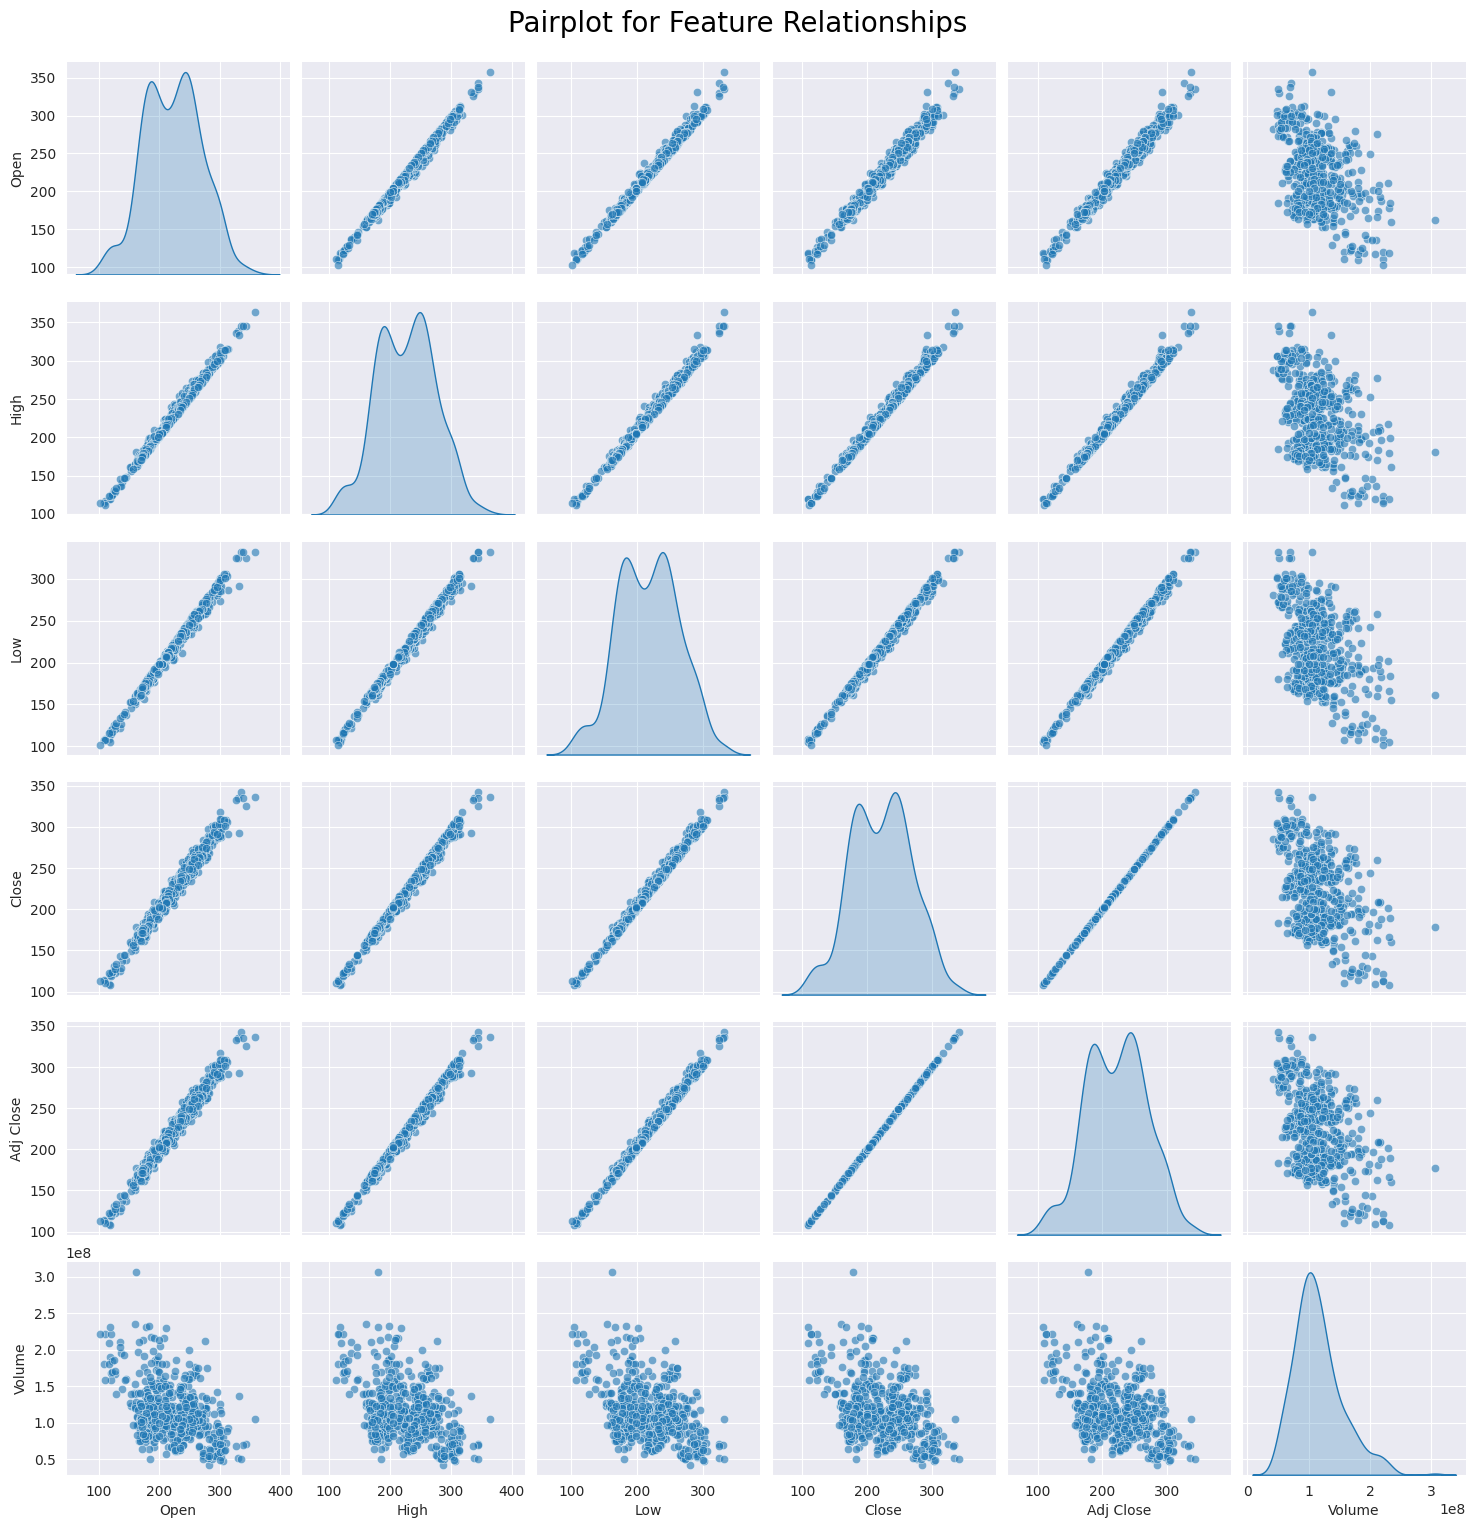

In [81]:
#Pair Plot
pairplot = sns.pairplot(tsla, diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot for Feature Relationships', fontsize=20, y=1.02, color='black')
pairplot.fig.set_facecolor('white')
plt.show()

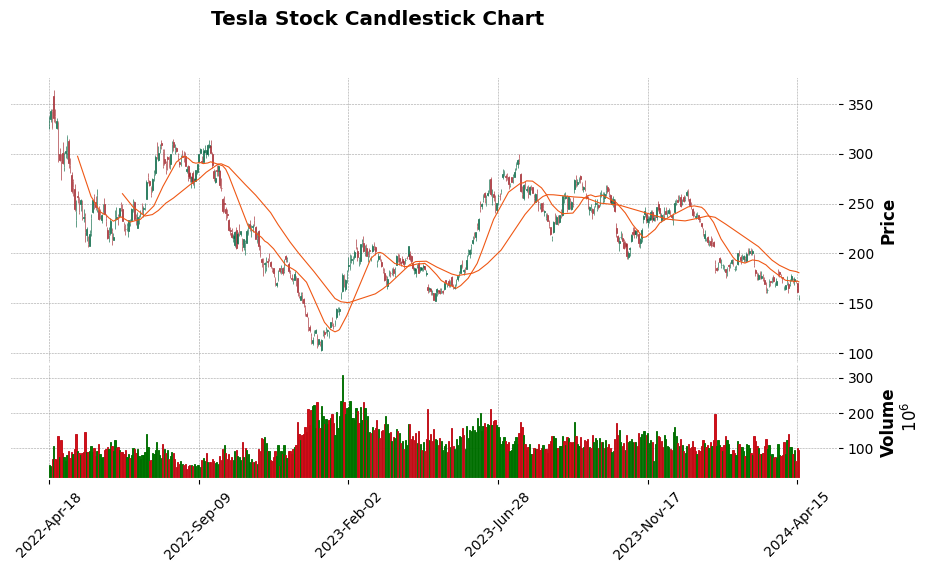

In [85]:
# Plot candlestick chart with moving averages
mpf.plot(tsla, type='candle', style='charles', mav=(20, 50),
         volume=True, title='Tesla Stock Candlestick Chart',
         ylabel='Price', ylabel_lower='Volume', figratio=(12, 6))

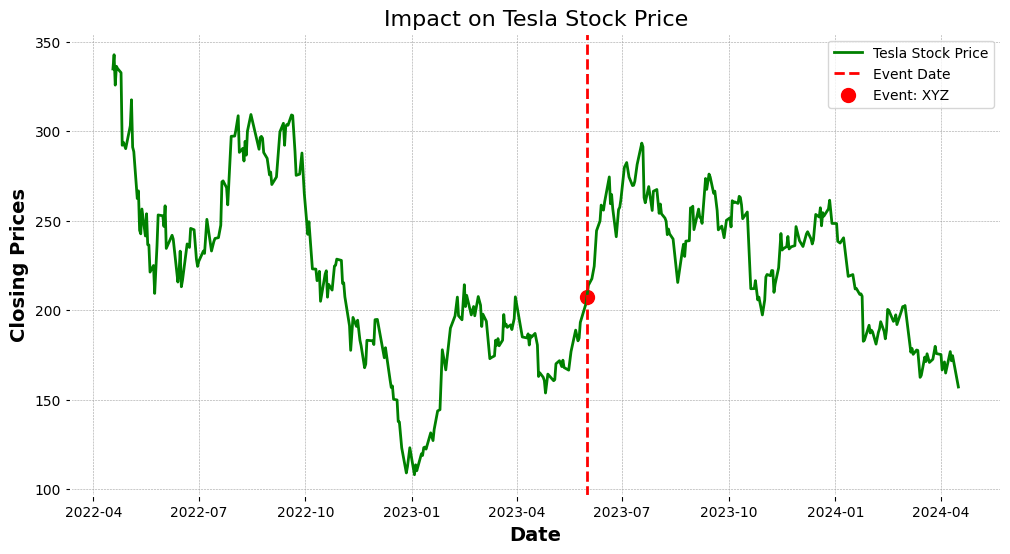

In [98]:
# Define event date and price
event_date = pd.Timestamp('2023-06-01')
event_price = tsla.loc[event_date, 'Close']

# Event Analysis
plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla['Close'], color='green', label='Tesla Stock Price')
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')
plt.scatter(event_date, event_price, color='red', s=100, label='Event: XYZ')
plt.title('Impact on Tesla Stock Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Prices', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [108]:
yearly_open = tsla.groupby(tsla['Year'])['Open'].sum().reset_index()
px.pie(yearly_open, values='Open', names='Year',
       title='Total Open Price by Year',
       color_discrete_sequence=['#A2D9D9', '#73C5C5', '#009596', '#003737'])

In [109]:
yearly_close = tsla.groupby(tsla['Year'])['Close'].sum().reset_index()
px.pie(yearly_close, values='Close', names='Year',
       title='Total Close Price by Year',
       color_discrete_sequence=['#A2D9D9', '#73C5C5', '#009596', '#003737'])

In [114]:
fig = go.Figure()
yearly_open_close = tsla.groupby('Year').agg({'Open': 'sum', 'Close': 'sum'}).reset_index()
fig.add_bar(x=yearly_open_close['Year'], y=yearly_open_close['Open'], name='Opening Price', marker_color='#73C5C5')
fig.add_bar(x=yearly_open_close['Year'], y=yearly_open_close['Close'], name='Closing Price', marker_color= '#009596')
fig.update_layout(title='Opening and Closing Prices Over the Years', xaxis_title='Year', yaxis_title='Price')